In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/raw/car_insurance_claims.csv")
print("Shape:", df.shape)
df.head()

Shape: (10000, 19)


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [2]:
df = df.drop(columns=["ID", "POSTAL_CODE"])
df.head()


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,12000.0,sedan,2,0,1,1


In [3]:
claim_rate = df["OUTCOME"].value_counts(normalize=True)
claim_rate


OUTCOME
0    0.6867
1    0.3133
Name: proportion, dtype: float64

In [4]:
df.dtypes


AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR            object
MARRIED                  int64
CHILDREN                 int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

In [5]:
X = df.drop(columns="OUTCOME")
y = df["OUTCOME"]

print(X.shape, y.shape)


(10000, 16) (10000,)


In [6]:
X_encoded = pd.get_dummies(X, drop_first=True)

print("Encoded shape:", X_encoded.shape)
X_encoded.head()


Encoded shape: (10000, 23)


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_26-39,AGE_40-64,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.629027,1,0,1,12000.0,0,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.357757,0,0,0,16000.0,0,0,0,False,False,...,False,False,False,True,False,True,False,False,True,False
2,0.493146,1,0,0,11000.0,0,0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
3,0.206013,1,0,1,11000.0,0,0,0,False,False,...,False,False,False,False,True,False,False,True,True,False
4,0.388366,1,0,0,12000.0,2,0,1,True,False,...,True,False,False,True,False,False,False,True,True,False


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train claim rate:", y_train.mean())
print("Test claim rate:", y_test.mean())


Train claim rate: 0.31333333333333335
Test claim rate: 0.3132


In [8]:
from sklearn.impute import SimpleImputer

num_cols = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]

imputer = SimpleImputer(strategy="median")
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
log_reg.fit(X_train, y_train)

log_reg.coef_.shape


(1, 23)

In [11]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

y_prob[:10]


array([0.03355104, 0.01483203, 0.3192487 , 0.07940999, 0.10610133,
       0.88987346, 0.38342373, 0.13715317, 0.00607452, 0.72024938])

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1521,  196],
       [ 217,  566]])

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

precision, recall, f1


(0.7427821522309711, 0.722860791826309, 0.7326860841423948)

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
roc_auc


np.float64(0.8880520912131782)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8348

In [16]:
import pandas as pd

risk_df = pd.DataFrame({
    "actual_claim": y_test.values,
    "predicted_prob": y_prob
})

risk_df["risk_tier"] = pd.qcut(
    risk_df["predicted_prob"],
    q=[0, 0.7, 0.9, 1.0],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

risk_df.head()


,actual_claim,predicted_prob,risk_tier
0,0,0.033551,Low Risk
1,0,0.014832,Low Risk
2,0,0.319249,Low Risk
3,0,0.079410,Low Risk
4,0,0.106101,Low Risk


In [17]:
risk_df.groupby("risk_tier")["actual_claim"].mean()


C:\Users\sorad\AppData\Local\Temp\ipykernel_31472\752692235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_df.groupby("risk_tier")["actual_claim"].mean()


risk_tier
Low Risk       0.127429
Medium Risk    0.660000
High Risk      0.920000
Name: actual_claim, dtype: float64

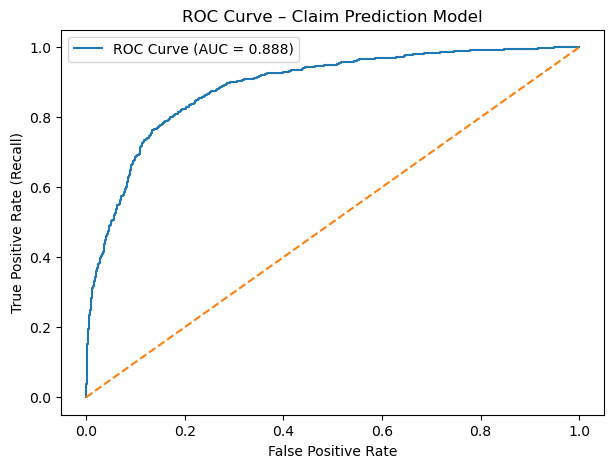

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Claim Prediction Model")
plt.legend()
plt.show()


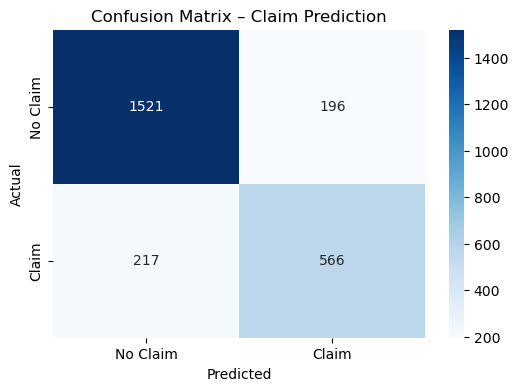

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Claim", "Claim"],
            yticklabels=["No Claim", "Claim"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Claim Prediction")
plt.show()


C:\Users\sorad\AppData\Local\Temp\ipykernel_31472\4161452489.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_claim_rate = risk_df.groupby("risk_tier")["actual_claim"].mean()


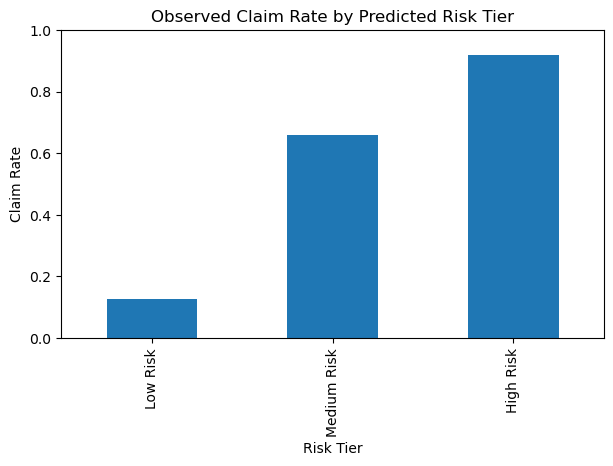

In [20]:
tier_claim_rate = risk_df.groupby("risk_tier")["actual_claim"].mean()

plt.figure(figsize=(7,4))
tier_claim_rate.plot(kind="bar")
plt.ylabel("Claim Rate")
plt.xlabel("Risk Tier")
plt.title("Observed Claim Rate by Predicted Risk Tier")
plt.ylim(0,1)
plt.show()


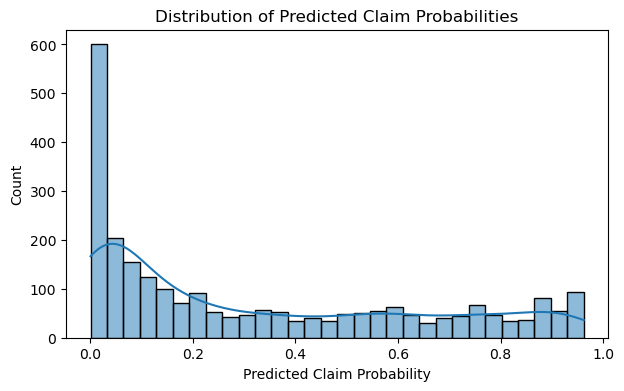

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(y_prob, bins=30, kde=True)
plt.xlabel("Predicted Claim Probability")
plt.title("Distribution of Predicted Claim Probabilities")
plt.show()
